# Passo 1: Coletar dados

Os dados selecionados para prever o mercado de pulsadores, tomadas e interruptores foram escolhidos com base em uma pesquisa realizada pela revista [O Setor Elétrico](https://www.osetoreletrico.com.br), publicação especializada no setor elétrico e energético, de fevereiro de 2013. Esta pesquisa aponta que novas construções representam um terço do mercado e que reformas e manutenções são responsáveis pelos outros dois terços do mercado.

Após um estudo inicial de quais dados poderiam ser relevantes para o estudo, foram selecionados, além dos Dados de Vendas de Pulsadores, Tomadas e Interruptores, já informados, o **Índice de Atividade Econômica (IBC-Br)**, a **Taxa de Desemprego**, o **Direcionamento dos Depósitos de Poupança para a Construção Civil**, o **Financiamento Imobiliário (residencial e comercial)** - todos estes dados fornecidos pelo Banco Central do Brasil, os **Dados sobre a Exportação de Material Elétrico** - fornecidos pela Associação Brasileira da Indústria Elétrica e Eletrônica, o **Produto Interno Bruto (PIB)**, absoluto e variação mensal - fornecido pela plataforma de dados IpeaData do Instituto de Pesquisa Econômica Aplicada, o **Consumo de Energia Elétrica** - fornecido pela Empresa de Pesquisa Energética, o **Índice de Confiança da Construção (ICST)** - fornecido pela Fundação Getúlio Vargas, a **Geração de Energia Elétrica** - fornecida pela Agência Nacional de Energia Elétrica e o **Índice de Confiança do Empresário Industrial (ICEI)** - também fornecido pela Associação Brasileira da Indústria Elétrica e Eletrônica.



1.   Histórico demanda interruptores. **OK**

2.   Índice da atividade econômica. **OK**

3.   Direcionamento financ. construção civil **OK**

4.   Financiamento imobiliário **OK**

5.   PIB (Setor Construção) **OK**

6.   Taxa de crescimento Setor Construção

7.   Consumo de energia elétrica **OK**

8.   Geração (e transmissão de energia) **OK**

9.   Índice de confiança da Construção (ICST) **OK**

10.  Taxa de desemprego **OK**

11.  Variação mensal do PIB (Calculada a partir de 5.) **OK** 

12.  Índice de Confiança do Empresário Industrial **OK**

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from datetime import date

## **Dados de vendas de Pulsadores, Interruptores e Tomadas**

In [36]:
vendas = pd.read_csv('datasets/serie_historica_2014_2020.csv') # Dados vendas interruptores, tomadas e pulsadores - ADP255.
vendas.head()
vendas.info()
vendas.describe()
vendas.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   ano            84 non-null     int64
 1   mes            84 non-null     int64
 2   interruptores  84 non-null     int64
 3   pulsadores     84 non-null     int64
 4   tomadas        84 non-null     int64
 5   total          84 non-null     int64
dtypes: int64(6)
memory usage: 4.1 KB


Index(['ano', 'mes', 'interruptores', 'pulsadores', 'tomadas', 'total'], dtype='object')

In [37]:
# cria a coluna de data no formato Datetime
vendas = vendas.rename(columns={'ano':'year','mes':'month'})
vendas['day'] = 1
vendas['date'] = pd.to_datetime(vendas[['year','month','day']])

# seta a coluna de data como index
vendas = vendas.set_index('date')

vendas # Base de dados para o trabalho.

,year,month,interruptores,pulsadores,tomadas,total,day
date,,,,,,,
2014-01-01,2014,1,5109625,149613,8168659,13427897,1
2014-02-01,2014,2,5235998,141128,8774994,14152120,1
2014-03-01,2014,3,5100680,144853,8465237,13710770,1
2014-04-01,2014,4,4695875,132094,7774926,12602895,1
2014-05-01,2014,5,5563254,156946,8883242,14603442,1
...,...,...,...,...,...,...,...
2020-08-01,2020,8,11713475,210921,22059317,33983713,1
2020-09-01,2020,9,10635364,229234,21341217,32205815,1
2020-10-01,2020,10,11688385,213752,21847140,33749277,1


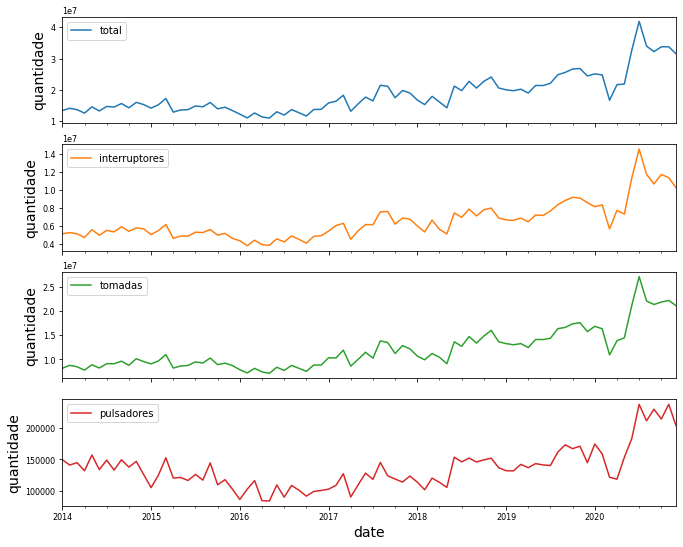

In [6]:
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=8)
mpl.rc('ytick', labelsize=8)
# plota o total de vendas e por tipo de produto
cols_plot = ['total', 'interruptores', 'tomadas', 'pulsadores']
axes = vendas[cols_plot].plot( figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('quantidade')

## **Índice de Atividade Econômica do Banco Central** (IBC-Br) 

Reflete as atividades da indústria, dos serviços e da agropecuária. Divulgado mensalmente, tem metodologia diferente da do PIB, portanto não é exatamente uma prévia deste índice.​

Fonte: https://www.bcb.gov.br/estatisticas/grafico/graficoestatistica/ibcbr


In [7]:
atividade_economica = pd.read_csv('datasets/IBC-Br-Atividade_Economica_2012_2020.csv', sep = ';', decimal=',') # Atividade Econômica - BACEN.

atividade_economica.head()
atividade_economica.info()
atividade_economica.describe()
atividade_economica.columns
atividade_economica['DateTime'] = pd.to_datetime(atividade_economica['DateTime'])

atividade_economica = atividade_economica.set_index('DateTime')

atividade_economica = atividade_economica['2014-01-01':'2020-12-12']

atividade_economica # Índice de atividade econômica.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   DateTime  118 non-null    object 
 1   IBC-Br    118 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.0+ KB


,IBC-Br
DateTime,
2014-01-01,2.75
2014-02-01,3.13
2014-03-01,3.09
2014-04-01,2.37
2014-05-01,2.23
...,...
2020-08-01,-3.35
2020-09-01,-3.56
2020-10-01,-3.94


<AxesSubplot:xlabel='DateTime', ylabel='IBC-Br'>

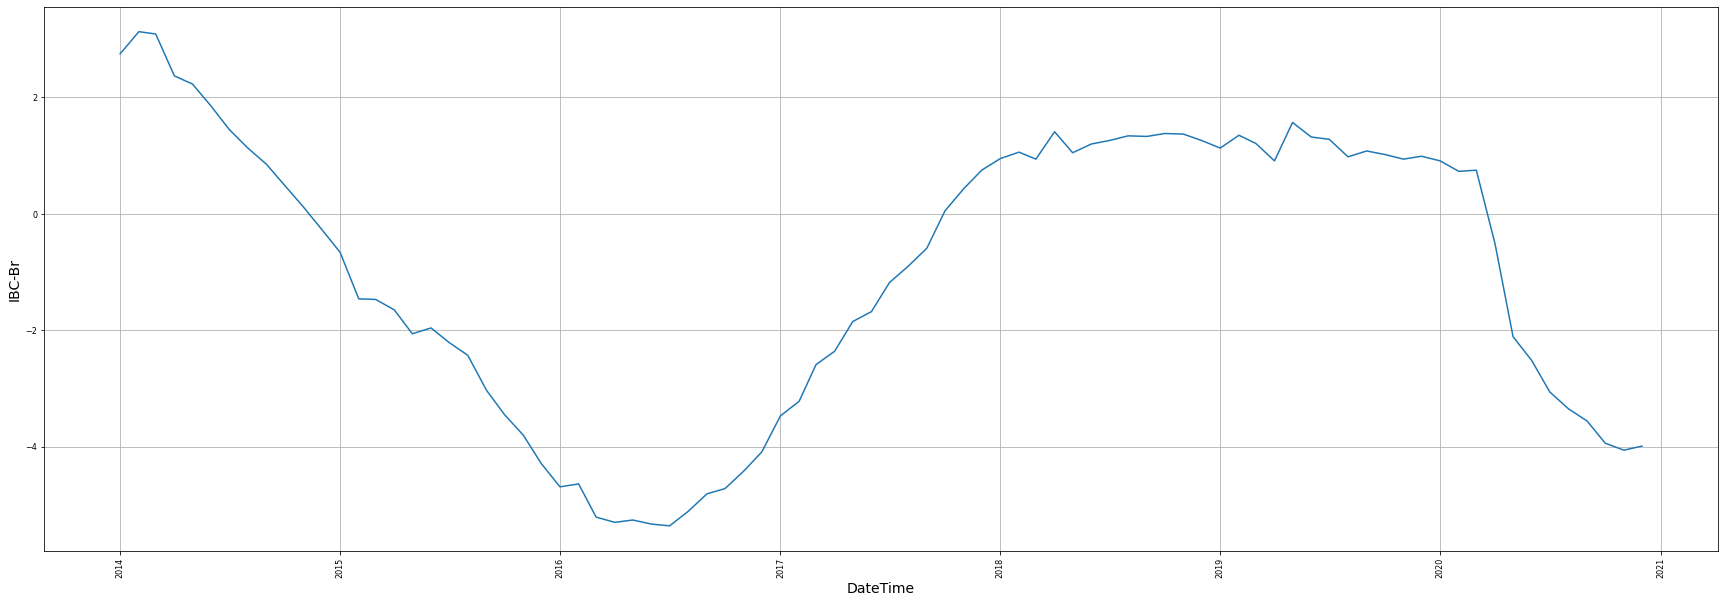

In [8]:
plt.figure(figsize=(30,10))
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=8)
mpl.rc('ytick', labelsize=8)
plt.xticks(rotation=90)
plt.grid(True)
sns.lineplot(data=atividade_economica, x = "DateTime", y = "IBC-Br")

## **Taxa de desemprego** (percentual de cidadãos desempregados). 

É o total de pessoas sem trabalho, mas que procuraram emprego, dividido pelo total de pessoas na força de trabalho. “Força de trabalho” refere-se às pessoas com 14 anos ou mais de idade com potencial para trabalhar.​

Fonte: https://www.bcb.gov.br/estatisticas/grafico/graficoestatistica/taxadesocupacao

In [9]:
desemprego = pd.read_csv('datasets/Taxa_Desocupacao-Desemprego_2012_2020.csv',  sep = ';', decimal=',') # Dados desocupação/desemprego - BACEN.
desemprego.head()
desemprego.info()
desemprego.describe()
desemprego.columns
desemprego['DateTime'] = pd.to_datetime(desemprego['DateTime'])
desemprego = desemprego.set_index('DateTime')

desemprego = desemprego['2014-01-01':'2020-12-12']

desemprego # Taxa de percentual de desemprego.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DateTime             106 non-null    object 
 1   Taxa de Desocupação  106 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.8+ KB


,Taxa de Desocupação
DateTime,
2014-01-01,6.4
2014-02-01,6.7
2014-03-01,7.2
2014-04-01,7.1
2014-05-01,7.0
...,...
2020-08-01,14.4
2020-09-01,14.6
2020-10-01,14.3


<AxesSubplot:xlabel='DateTime', ylabel='Taxa de Desocupação'>

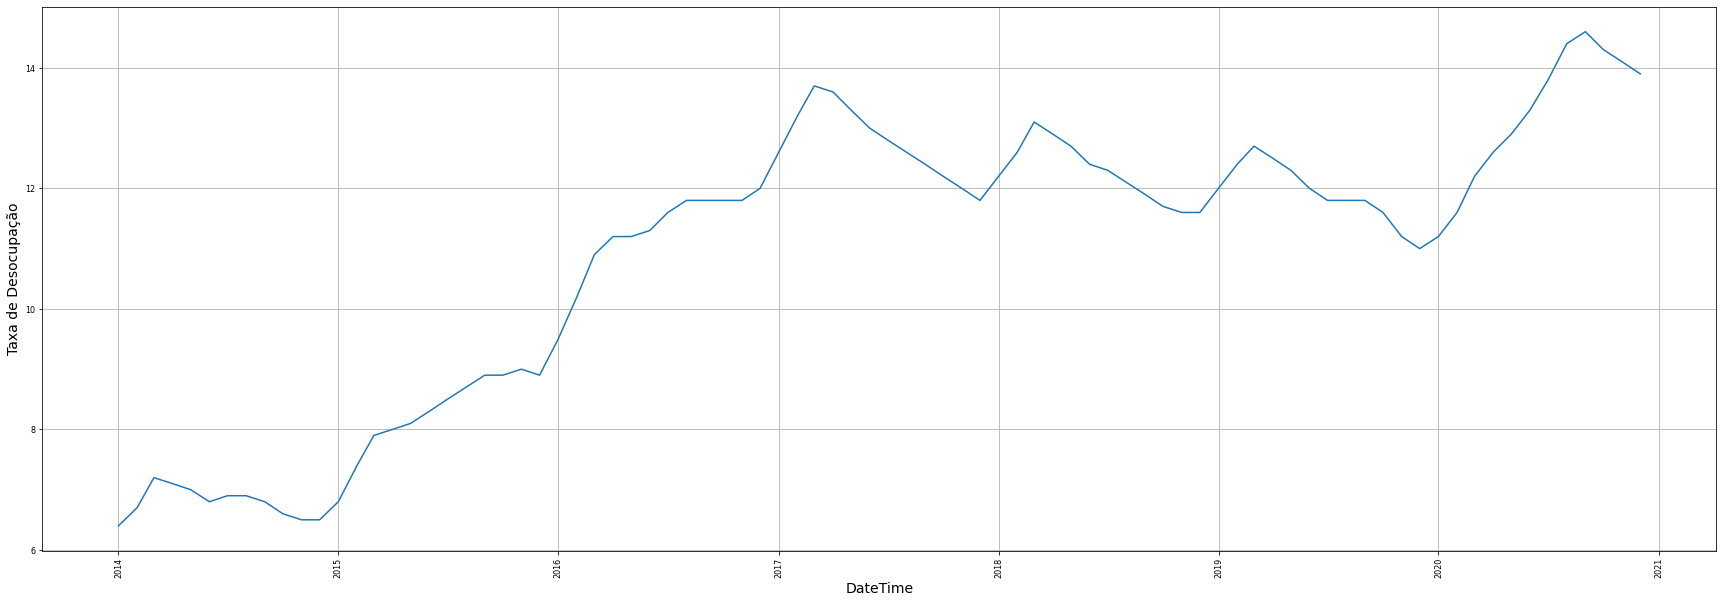

In [10]:
plt.figure(figsize=(30,10))
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=8)
mpl.rc('ytick', labelsize=8)
plt.xticks(rotation=90)
plt.grid(True)
sns.lineplot(data=desemprego, x = "DateTime", y = "Taxa de Desocupação")

## **Direcionamento dos Depósitos de Poupança para Construção Civil**

Deve corresponder ao valor contábil bruto dos financiamentos a pessoas naturais para construção de imóveis residenciais (nas condições do Sistema Financeiro de Habitação - SFH ou não) e de imóveis não residenciais.

Fonte: https://www.bcb.gov.br/estatisticas/grafico/graficocosic/direcionamento_construcao

In [11]:
gasto_construcao = pd.read_csv('datasets/Construcao_2014_2020.csv', sep = ';', decimal=',', parse_dates=[0]) # Gasto com a Construção Civil - BACEN.

gasto_construcao['DateTime'] = gasto_construcao['DateTime'].apply(lambda x: x.replace(day=1))

gasto_construcao = gasto_construcao.set_index('DateTime')

gasto_construcao = gasto_construcao['2014-01-01':'2020-12-12']

taxa = gasto_construcao.loc['2014-05-01']['Imobiliário']/gasto_construcao.loc['2014-04-01']['Imobiliário']

# Pensar o que fazer em relação a estes 3 meses
gasto_construcao.loc[pd.to_datetime('2014-03-01')] = gasto_construcao.loc['2014-04-01'].values[0]/taxa
gasto_construcao.loc[pd.to_datetime('2014-02-01')] = gasto_construcao.loc['2014-03-01'].values[0]/taxa
gasto_construcao.loc[pd.to_datetime('2014-01-01')] = gasto_construcao.loc['2014-02-01'].values[0]/taxa

gasto_construcao = gasto_construcao.sort_index(ascending=True)

gasto_construcao # Gastos com a Construção Civil (residencial + comercial) em bilhões de reais.



,Imobiliário
DateTime,
2014-01-01,1.827669e+10
2014-02-01,1.859720e+10
2014-03-01,1.892334e+10
2014-04-01,1.925519e+10
2014-05-01,1.959286e+10
...,...
2020-08-01,5.106029e+10
2020-09-01,5.152290e+10
2020-10-01,5.201850e+10


<AxesSubplot:xlabel='DateTime', ylabel='Imobiliário'>

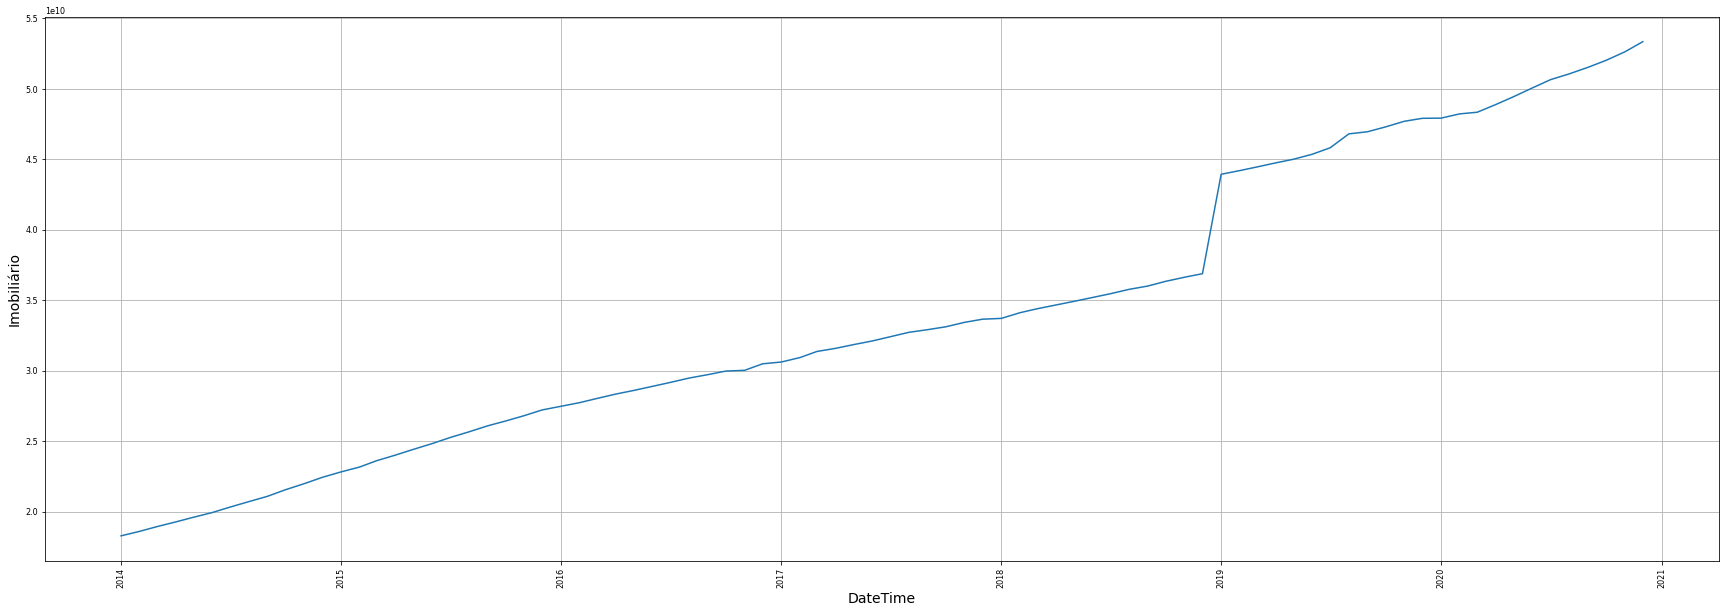

In [12]:
plt.figure(figsize=(30,10))
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=8)
mpl.rc('ytick', labelsize=8)
plt.xticks(rotation=90)
plt.grid(True)
sns.lineplot(data=gasto_construcao, x = "DateTime", y = "Imobiliário")

## **Financiamento Imobiliário**

**Residencial** registra as operações de crédito destinadas à construção, reforma, ampliação e aquisição de unidades habitacionais, realizadas nas condições regulamentadas pelo Sistema Financeiro da Habitação - SFH, pelo Sistema Hipotecário e por outras modalidades operacionais. 

**Comercial** registra as operações de crédito destinadas à construção, reforma, ampliação e aquisição de unidades industriais e comerciais, exceto as habitacionais. 

As rendas a incorporar de financiamentos imobiliários devem ser registradas nas adequadas contas de financiamentos imobiliários, mediante controle em subtítulo de uso interno.Os valores das rubricas são equivalentes ao conceito de carteira ativa das operações de crédito do SCR. 

Fonte: https://www.bcb.gov.br/estatisticas/grafico/graficocosic/contabil_financiamentos_imobiliarios

In [13]:
financiamentos_construcao = pd.read_csv('datasets/Financiamentos_2014_2020.csv', sep = ';', decimal=',')
financiamentos_construcao # Tem que selecionar o período que nos interessa.
financiamentos_construcao['total'] = financiamentos_construcao['Comercial'] + financiamentos_construcao['Residencial']

### Financiamento Residencial

In [14]:
financiamento_residencial = financiamentos_construcao.loc[: , ['DateTime', 'Residencial']]

financiamento_residencial['DateTime'] = pd.to_datetime(financiamento_residencial['DateTime'] )

financiamento_residencial['DateTime'] = financiamento_residencial['DateTime'].apply(lambda x: x.replace(day=1))

financiamento_residencial = financiamento_residencial.set_index('DateTime')

financiamento_residencial = financiamento_residencial['2014-01-01':'2020-12-12']

taxa = financiamento_residencial.loc['2014-05-01']['Residencial']/financiamento_residencial.loc['2014-04-01']['Residencial']

# Pensar o que fazer em relação a estes 3 meses
financiamento_residencial.loc[pd.to_datetime('2014-03-01')] = financiamento_residencial.loc['2014-04-01'].values[0]/taxa
financiamento_residencial.loc[pd.to_datetime('2014-02-01')] = financiamento_residencial.loc['2014-03-01'].values[0]/taxa
financiamento_residencial.loc[pd.to_datetime('2014-01-01')] = financiamento_residencial.loc['2014-02-01'].values[0]/taxa

financiamento_residencial = financiamento_residencial.sort_index(ascending=True)

financiamento_residencial # Volume de financiamentos destinados à construção - Setor Residencial



,Residencial
DateTime,
2014-01-01,3.791781e+11
2014-02-01,3.886426e+11
2014-03-01,3.983434e+11
2014-04-01,4.082862e+11
2014-05-01,4.184773e+11
...,...
2020-08-01,6.995890e+11
2020-09-01,7.067158e+11
2020-10-01,7.143470e+11


<AxesSubplot:xlabel='DateTime', ylabel='Residencial'>

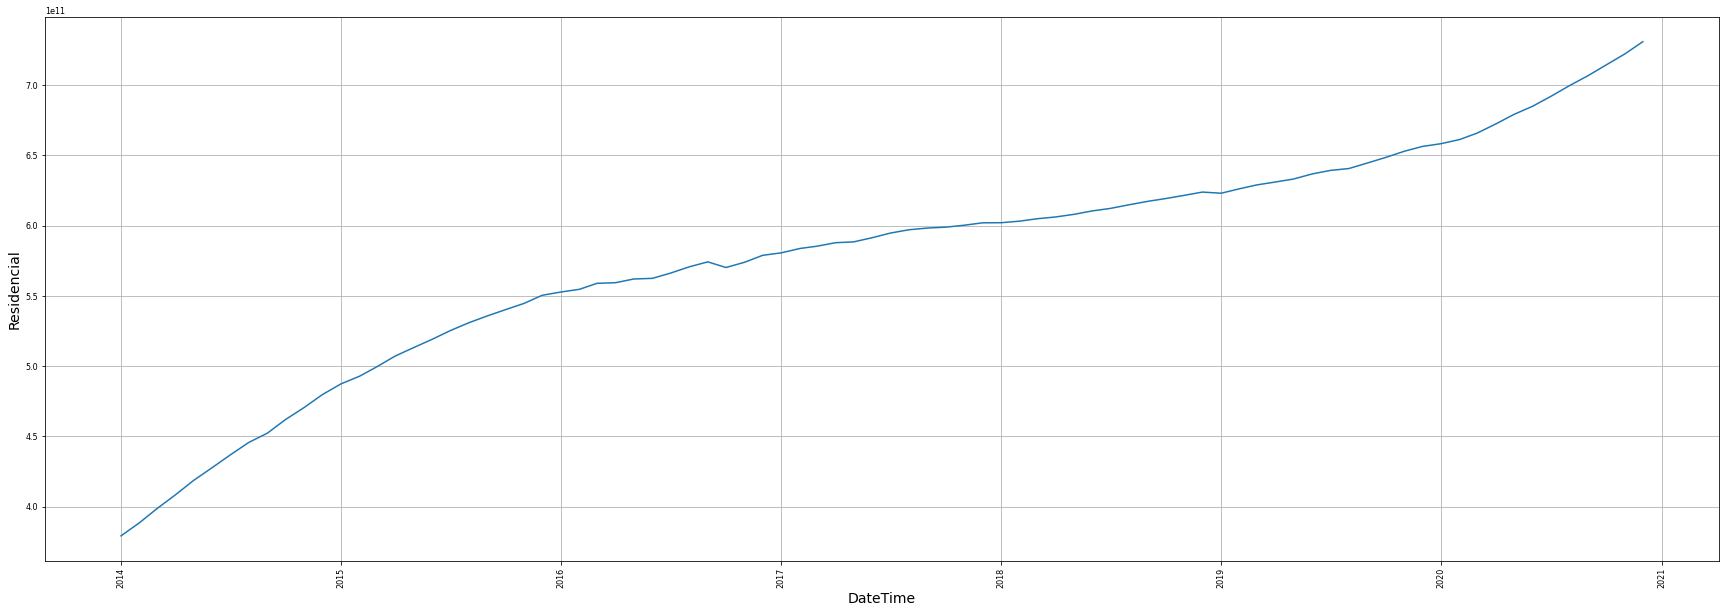

In [15]:
plt.figure(figsize=(30,10))
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=8)
mpl.rc('ytick', labelsize=8)
plt.xticks(rotation=90)
plt.grid(True)
sns.lineplot(data=financiamento_residencial, x = "DateTime", y = "Residencial") # Tem que ajustar os rótulos.

### Financiamento Comercial

In [16]:
financiamento_comercial = financiamentos_construcao.loc[: , ['DateTime', 'Comercial']]

financiamento_comercial['DateTime'] = pd.to_datetime(financiamento_comercial['DateTime'] )

financiamento_comercial['DateTime'] = financiamento_comercial['DateTime'].apply(lambda x: x.replace(day=1))

financiamento_comercial = financiamento_comercial.set_index('DateTime')

financiamento_comercial = financiamento_comercial['2014-01-01':'2020-12-12']

taxa = financiamento_comercial.loc['2014-05-01']['Comercial']/financiamento_comercial.loc['2014-04-01']['Comercial']

# Pensar o que fazer em relação a estes 3 meses
financiamento_comercial.loc[pd.to_datetime('2014-03-01')] = financiamento_comercial.loc['2014-04-01'].values[0]/taxa
financiamento_comercial.loc[pd.to_datetime('2014-02-01')] = financiamento_comercial.loc['2014-03-01'].values[0]/taxa
financiamento_comercial.loc[pd.to_datetime('2014-01-01')] = financiamento_comercial.loc['2014-02-01'].values[0]/taxa

financiamento_comercial = financiamento_comercial.sort_index(ascending=True)

financiamento_comercial # Volume de financiamentos destinados à construção - Setor Comercial

,Comercial
DateTime,
2014-01-01,1.243798e+10
2014-02-01,1.284174e+10
2014-03-01,1.325861e+10
2014-04-01,1.368902e+10
2014-05-01,1.413339e+10
...,...
2020-08-01,1.382031e+10
2020-09-01,1.340438e+10
2020-10-01,1.329268e+10


<AxesSubplot:xlabel='DateTime', ylabel='Comercial'>

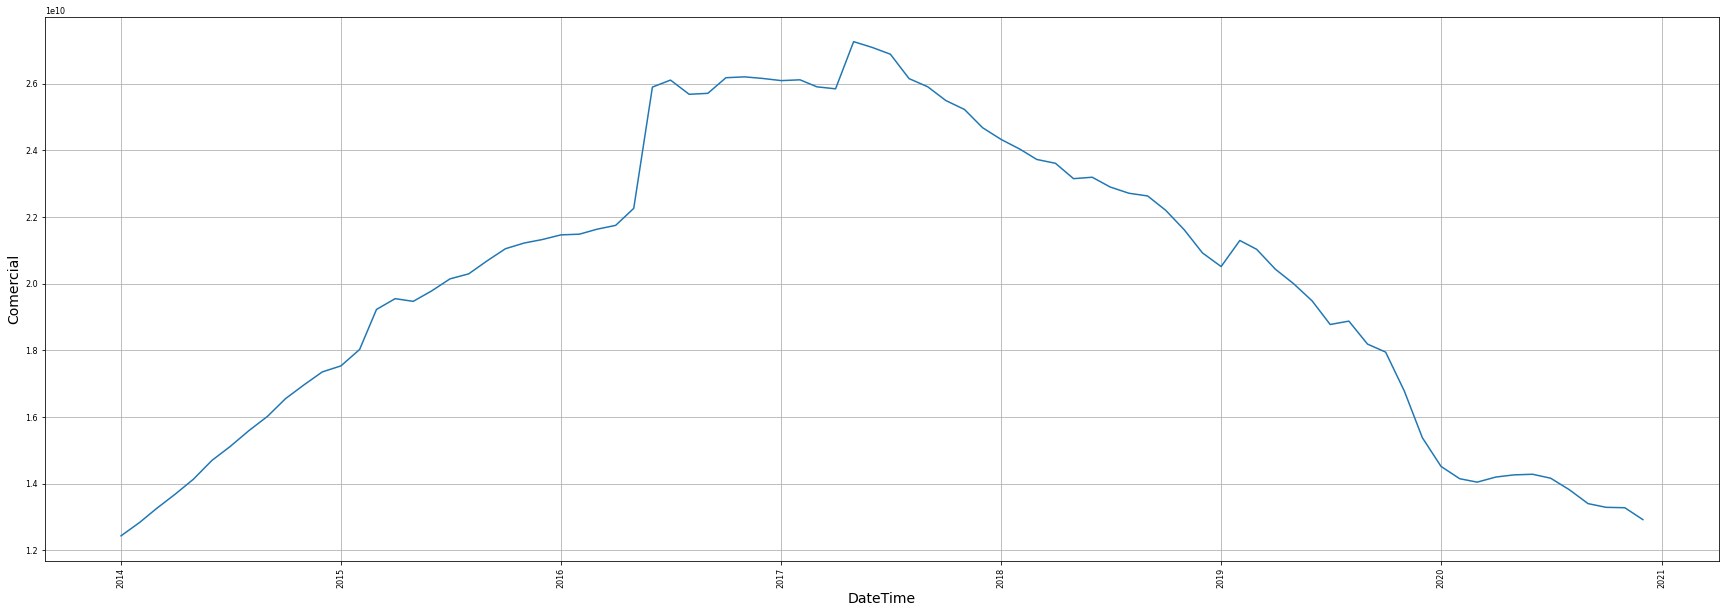

In [17]:
plt.figure(figsize=(30,10))
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=8)
mpl.rc('ytick', labelsize=8)
plt.xticks(rotation=90)
plt.grid(True)
sns.lineplot(data=financiamento_comercial, x = "DateTime", y = "Comercial") # Tem que ajustar os rótulos.

Observem a 'inversão' nos financiamentos...

## **Dados sobre a exportação de material elétrico**

A exportação de produtos pode ampliar os mercados e aumentar a receita de vendas das empresas,  porém, com o direcionamento de produtos para mercados internacionais, as vendas domésticas podem ser prejudicadas, já que há menos estoque para distribuição nacional.

As quantidades apresentadas são o volume de exportações em Milhões de US$.


Fonte: MDIC / SECEX	/ Abinee/Decon - <http://www.abinee.org.br/abinee/decon/dados/> - Última atualização em 19/04/2021.

In [18]:

from time import strptime

df = pd.read_csv('datasets/exportacao.csv', usecols=['MES','MATERIAL ELÉTRICO DE INSTALAÇÃO'])

df['day'] = 1
df['month'] = df.apply(lambda row: strptime(row.MES[0:3],'%b').tm_mon, axis=1)
df['year'] = df.apply(lambda row: str(20)+row.MES[4:], axis=1)
df['data'] = pd.to_datetime(df[['year','month','day']])

df = df.set_index('data')
df = df.rename(columns={'MATERIAL ELÉTRICO DE INSTALAÇÃO':'material_eletrico'})

exportacoes = df[['material_eletrico']]

exportacoes

,material_eletrico
data,
2014-01-01,6.9
2014-02-01,7.3
2014-03-01,7.8
2014-04-01,6.8
2014-05-01,9.9
...,...
2020-08-01,3.0
2020-09-01,3.5
2020-10-01,4.5


<AxesSubplot:xlabel='data', ylabel='material_eletrico'>

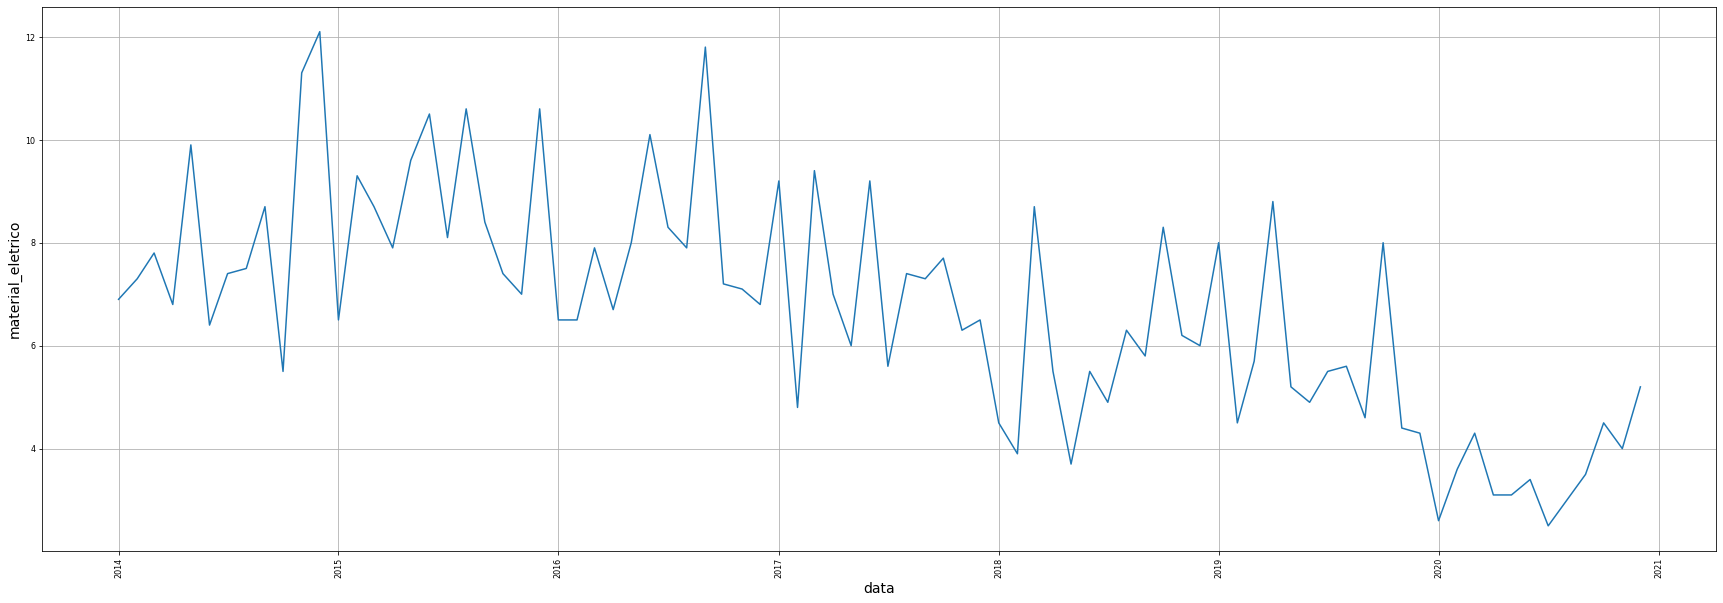

In [19]:
plt.figure(figsize=(30,10))
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=8)
mpl.rc('ytick', labelsize=8)
plt.xticks(rotation=90)
plt.grid(True)
sns.lineplot(data=exportacoes, x = "data", y = "material_eletrico")


## **Produto Interno Bruto (PIB)** 

### PIB Absoluto
Frequência: Mensal de 1990.01 até 2021.02

Fonte: Banco Central do Brasil, Boletim, Seção Atividade Econômica

Unidade: R$ (milhões)

Comentário: O Produto Interno Bruto (PIB) denominado como PIB mensal é um indicador com frequência mensal produzido pelo Banco Central do Brasil (BCB) para utilização no cálculo da relação entre agregados econômicos mensais (como dívida pública, saldo em transações correntes e saldo de crédito) e o PIB.Elaboração Bacen: estimativa é feita via interpolação dos valores trimestrais já divulgados ou dos projetados, não se tratatando de cálculo do PIB a partir de informações primárias. Nota: Este cálculo mensal é feito uma vez que o PIB calculado oficialmente no Brasil pelo IBGE, é divulgado com frequência trimestral, ao passo que várias informações econômicas compiladas pelo Banco Central são mensais. Mais informações: SGS- Sistema de Gerenciamento de Séries Temporais, Banco Central. Atualizado em: 26/04/2021

Fonte: http://www.ipeadata.gov.br/ExibeSerie.aspx?serid=521274780&module=M


In [20]:

pib_mensal = pd.read_csv('datasets/PIB_Variacao_Mensal_1990-2021.csv', sep = '\t', decimal=',')
pib_mensal.reset_index(inplace = True)
pib_mensal.columns=['Data', 'PIB']


pib_mensal['Data'] = pd.to_datetime(pib_mensal['Data'])
pib_mensal['Data'] = pib_mensal['Data'].dt.strftime('%Y-%m-%d') # Ajusta a coluna da data.
pib_mensal['PIB'] = pib_mensal['PIB'].str.replace('.', '-')
pib_mensal['PIB'] = pib_mensal['PIB'].str.replace('-', '')
pib_mensal['PIB'] = pib_mensal['PIB'].str.replace(',', '.')
pib_mensal.head()
pib_mensal.PIB = pib_mensal.PIB.astype('float')

pib_mensal.PIB = pib_mensal.PIB.astype('float')
pib_mensal_interesse = pib_mensal.iloc[288:372, :]
pib_mensal_interesse['Data'] = pd.to_datetime(pib_mensal_interesse['Data'])
pib_mensal_interesse = pib_mensal_interesse.set_index('Data')

pib_mensal_interesse # Esses são os valores mensais totais do PIB em milhões de Reais.


<ipython-input-20-c641fe111e1d>:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  pib_mensal['PIB'] = pib_mensal['PIB'].str.replace('.', '-')
<ipython-input-20-c641fe111e1d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pib_mensal_interesse['Data'] = pd.to_datetime(pib_mensal_interesse['Data'])


,PIB
Data,
2014-01-01,455935.0
2014-02-01,450358.8
2014-03-01,462159.8
2014-04-01,468767.5
2014-05-01,473347.1
...,...
2020-08-01,628818.8
2020-09-01,632047.2
2020-10-01,660199.5


<AxesSubplot:xlabel='Data', ylabel='PIB'>

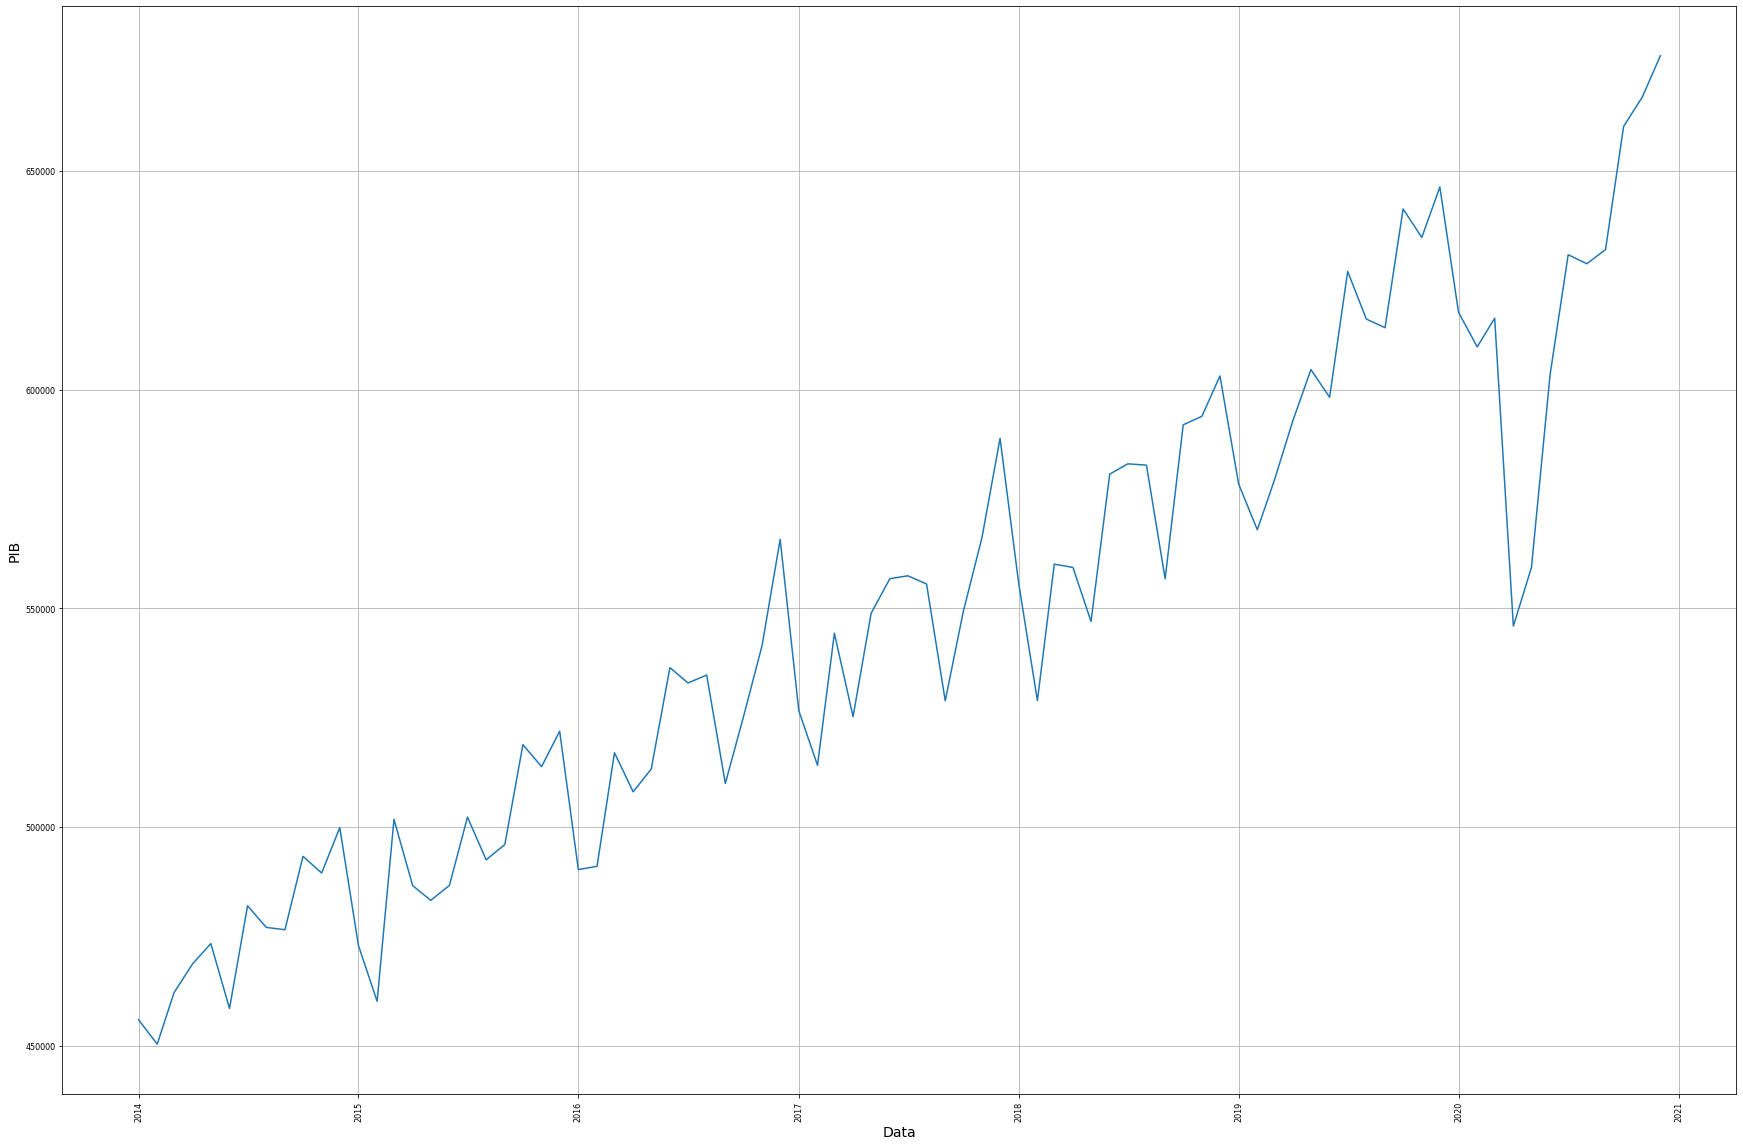

In [21]:
plt.figure(figsize=(30,20))
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=8)
mpl.rc('ytick', labelsize=8)
plt.xticks(rotation=90)
plt.grid(True)
sns.lineplot(data=pib_mensal_interesse, x = "Data", y = 'PIB')

### PIB Variação Mensal

In [22]:
variacao_mensal_pib = pib_mensal.copy()
variacao_mensal_pib = variacao_mensal_pib.iloc[287:372, :]
variacao_mensal_pib.PIB = (variacao_mensal_pib.PIB- variacao_mensal_pib.PIB.shift(1))/(variacao_mensal_pib.PIB.shift(1))*100

variacao_mensal_pib = variacao_mensal_pib.dropna(axis=0, how='any')
variacao_mensal_pib.columns = ['Data', 'Variacao_PIB']
from datetime import date
variacao_mensal_pib['Data'] = pd.to_datetime(variacao_mensal_pib['Data'])
variacao_mensal_pib['Data'] = variacao_mensal_pib['Data'].dt.strftime('%Y-%m-%d') # Ajusta a coluna da data.
variacao_mensal_pib['Data'] = pd.to_datetime(variacao_mensal_pib['Data'])
variacao_mensal_pib = variacao_mensal_pib.set_index('Data')

variacao_mensal_pib # Estas são as variações percentuais em relção ao mês anterior.

,Variacao_PIB
Data,
2014-01-01,-3.720284
2014-02-01,-1.223025
2014-03-01,2.620355
2014-04-01,1.429744
2014-05-01,0.976945
...,...
2020-08-01,-0.325028
2020-09-01,0.513407
2020-10-01,4.454145


<AxesSubplot:xlabel='Data', ylabel='Variacao_PIB'>

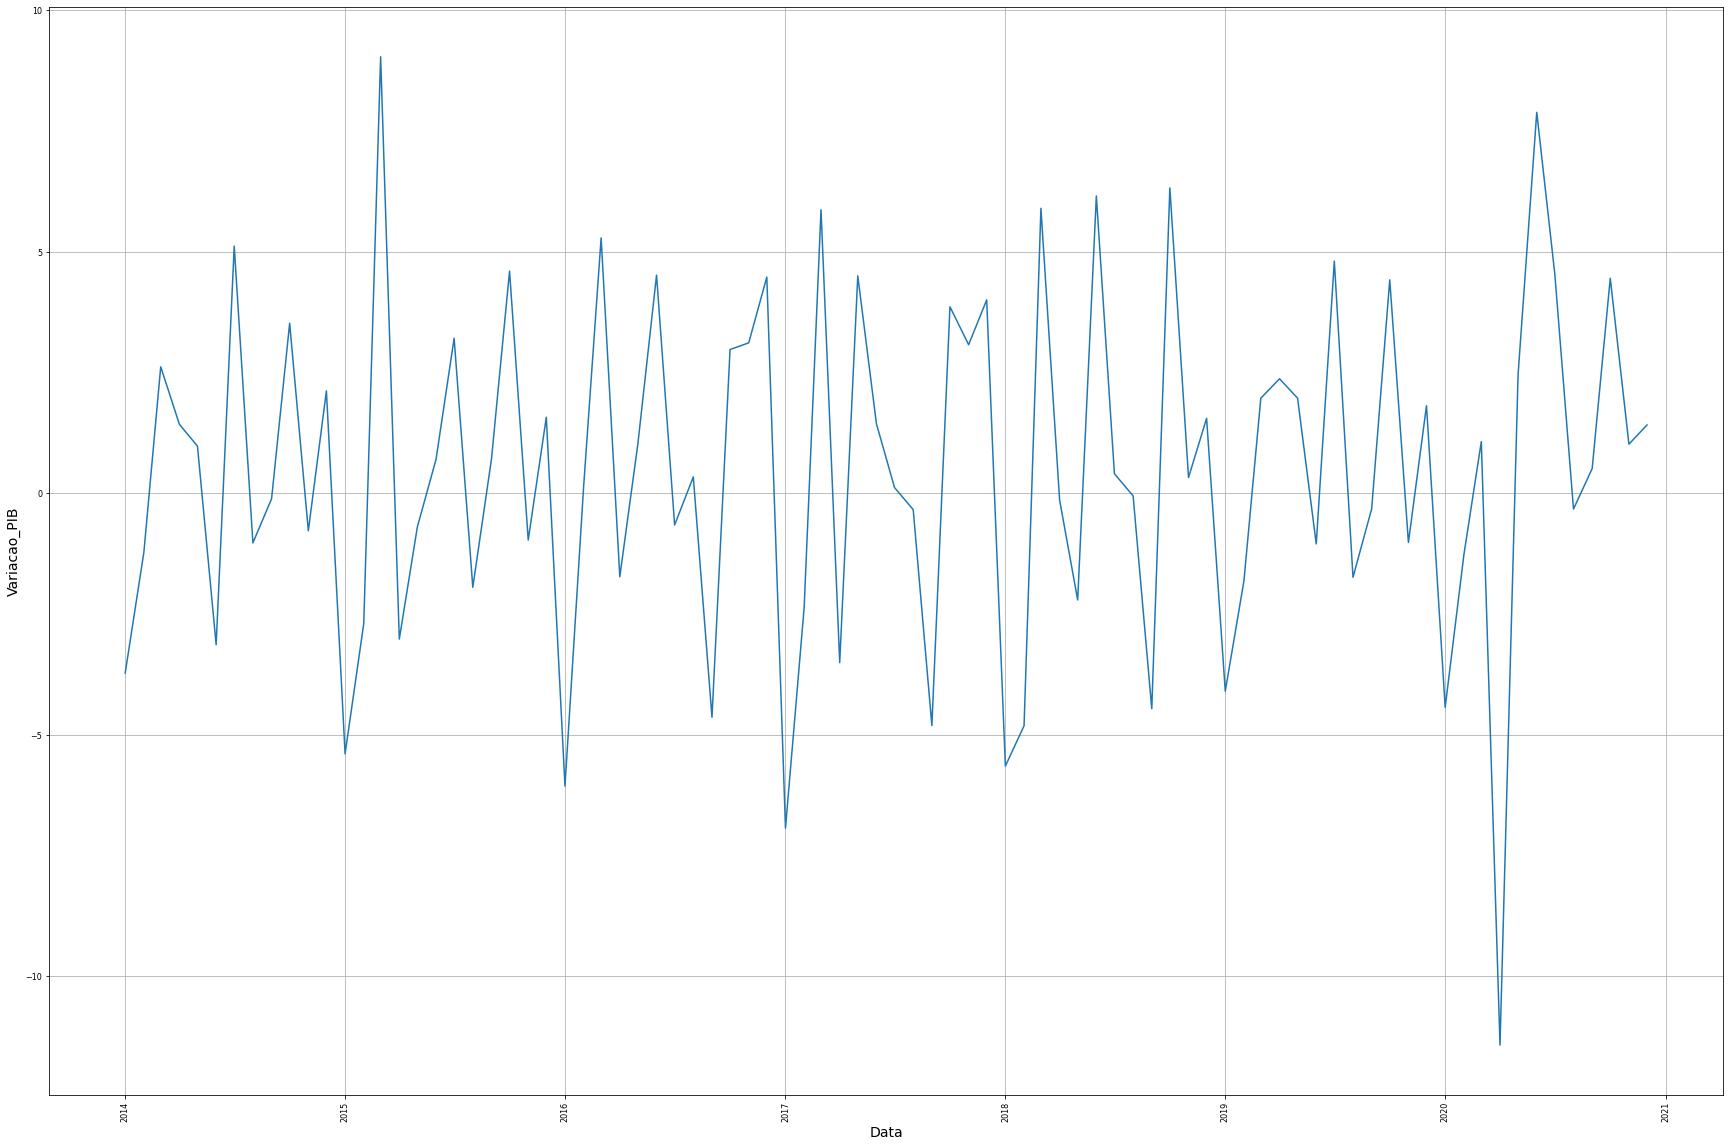

In [23]:
plt.figure(figsize=(30,20))
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=8)
mpl.rc('ytick', labelsize=8)
plt.xticks(rotation=90)
plt.grid(True)
sns.lineplot(data=variacao_mensal_pib, x = "Data", y = 'Variacao_PIB')

## **Consumo de Energia Elétrica**

Consumo Mensal de Energia Elétrica em MWh

Fonte: EPE - https://www.epe.gov.br/pt/publicacoes-dados-abertos/publicacoes/Consumo-mensal-de-energia-eletrica-por-classe-regioes-e-subsistemas

In [24]:
consumo_energia_eletrica = pd.DataFrame()

consumo_energia_eletrica = pd.read_excel('datasets/consumo_mensal_energia_eletrica_2014_2020.xls', sheet_name= "Trabalho")
# Eu criei essa sheet 'Trabalho' na força bruta: achei que daria menos trabalho.
consumo_energia_eletrica = consumo_energia_eletrica.dropna(axis=0, how='any')

consumo_energia_eletrica['Data'] = pd.to_datetime(consumo_energia_eletrica['Data'])
consumo_energia_eletrica['Data'] = consumo_energia_eletrica['Data'].dt.strftime('%Y-%m-%d') # Ajusta a coluna da data.
consumo_energia_eletrica['Data'] = pd.to_datetime(consumo_energia_eletrica['Data'])
consumo_energia_eletrica = consumo_energia_eletrica.set_index('Data')
consumo_energia_eletrica.CONSUMO = consumo_energia_eletrica.CONSUMO.astype('float')

consumo_energia_eletrica # Consumo de energia elétrica em MWh.

,CONSUMO
Data,
2014-01-01,4.027976e+07
2014-02-01,4.165349e+07
2014-03-01,4.026943e+07
2014-04-01,3.959185e+07
2014-05-01,3.910050e+07
...,...
2020-08-01,3.912152e+07
2020-09-01,4.020856e+07
2020-10-01,4.245064e+07


<AxesSubplot:xlabel='Data', ylabel='CONSUMO'>

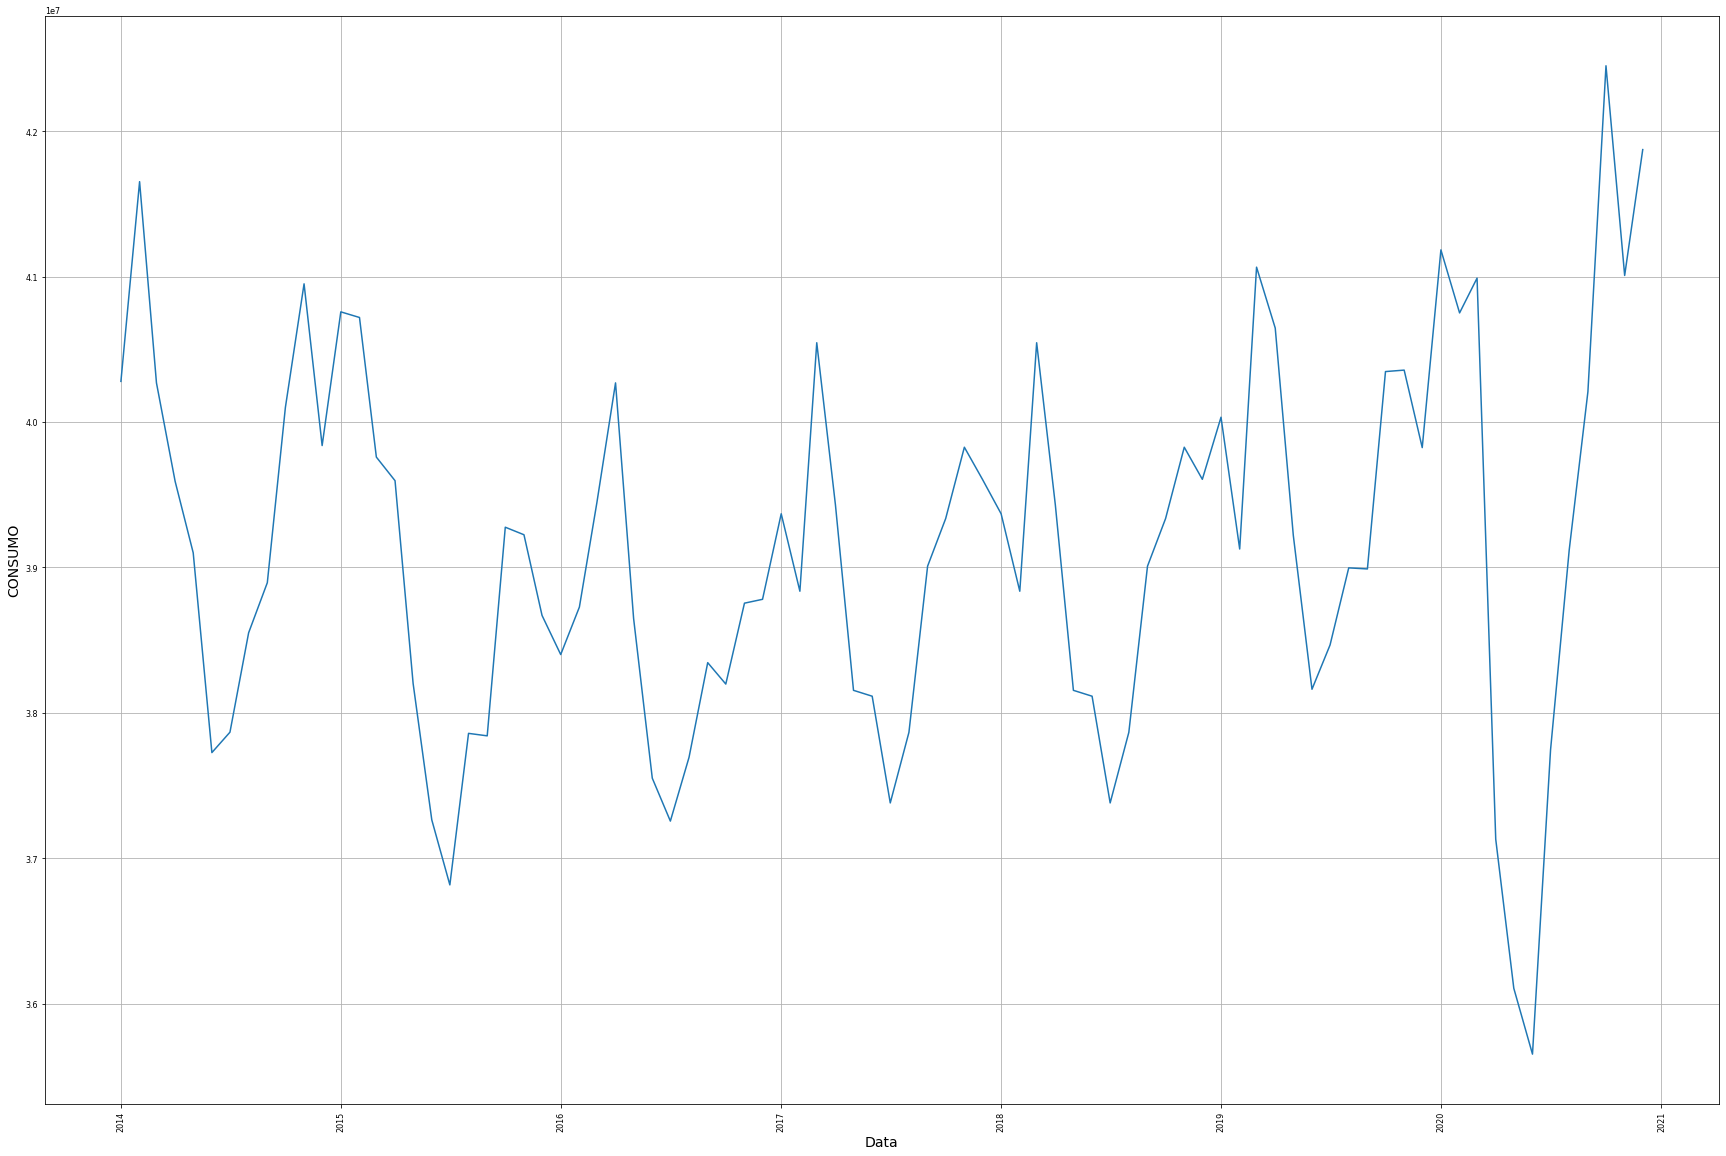

In [25]:
plt.figure(figsize=(30,20))
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=8)
mpl.rc('ytick', labelsize=8)
plt.xticks(rotation=90)
plt.grid(True)
sns.lineplot(data=consumo_energia_eletrica, x = "Data", y = 'CONSUMO')

## **Índice de Confiança da Construção (ICST)**

A Sondagem da Construção é uma pesquisa que gera, mensalmente, um conjunto de informações usados no monitoramento e antecipação de tendências econômicas do setor. Tendo como referência as melhores práticas internacionais para pesquisas do gênero, a Sondagem tem como um de seus principais atributos a rapidez com que é produzida e divulgada, tornando-se uma ferramenta essencial à análise de conjuntura e à tomada de decisão nos âmbitos público e privado.

O questionário básico da Sondagem da Construção é composto por 13 perguntas direcionadas exclusivamente à atividade econômica da empresa. Abrangem temas como o nível atual de demanda, absorção de mão de obra, acesso ao crédito e situação geral dos negócios.

As perguntas apresentam opções de resposta de natureza qualitativa. A pergunta sobre situação atual dos negócios, por exemplo, oferece as seguintes opções de resposta: boa, normal ou ruim. As perspectivas para a evolução do pessoal ocupado pela empresa nos três meses seguintes podem ser consideradas pela empresa como sendo de aumento, estabilidade ou diminuição.

O horizonte temporal das perguntas pode ser classificado em quatro modalidades: observações a respeito do trimestre imediatamente anterior ao mês de referência da pesquisa; avaliações sobre o momento de realização da pesquisa; previsões para o trimestre que se inicia no mês de referência da pesquisa; e previsões para o semestre que se inicia no mês de referência da pesquisa, horizonte adotado somente no quesito relativo às perspectivas para a situação dos negócios.

O Índice de Confiança da Construção (ICST) é o indicador-síntese da pesquisa, composto por quatro quesitos: Situação Atual dos Negócios, Carteira de Contratos, Expectativas com relação à evolução do Volume de Demanda nos três meses seguintes e Expectativas em relação à evolução da Situação dos Negócios da Empresa nos seis meses seguintes.

As classes e os grupos setoriais são definidos de acordo com a Classificação Nacional de Atividades Econômicas, versão 2.0 (CNAE 2.0), do IBGE.

Fonte: http://www14.fgv.br/fgvdados20/consulta.aspx

Fonte: https://portalibre.fgv.br/estudos-e-pesquisas/indices-de-precos/sondagem-da-construcao




In [26]:
icst = pd.read_csv('datasets/ICST-FGV_2014_20120.csv', sep = ';', decimal=',')
icst.columns=['Data', 'ICST-A', 'ICST-R']

icst['Data'] = pd.to_datetime(icst['Data'])
icst['Data'] = icst['Data'].dt.strftime('%Y-%m-%d') # Ajusta a coluna da data.
icst['Data'] = pd.to_datetime(icst['Data'])

icst = icst.set_index('Data')
icst

# Colunas => 'ICST-A' valores ajustados; 'ICST-R' valores brutos; segundo o site do IBGE, os ajustes referem-se à retirada da sazonalidade.

,ICST-A,ICST-R
Data,,
2014-01-01,99.6,97.8
2014-02-01,98.4,96.7
2014-03-01,97.1,96.3
2014-04-01,92.9,92.6
2014-05-01,95.2,94.6
...,...,...
2020-08-01,87.5,87.8
2020-09-01,90.5,91.5
2020-10-01,93.7,95.2


<AxesSubplot:xlabel='Data', ylabel='ICST-R'>

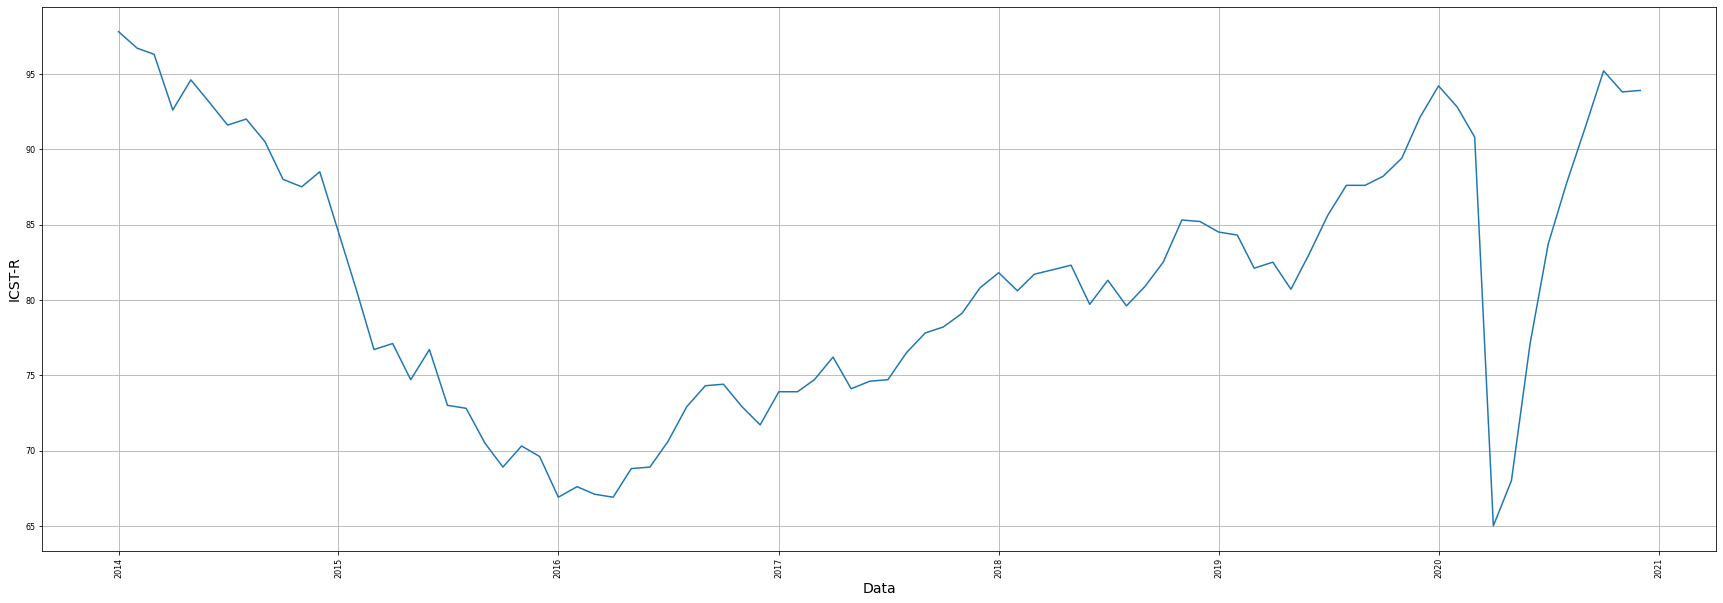

In [27]:
plt.figure(figsize=(30,10))
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=8)
mpl.rc('ytick', labelsize=8)
plt.xticks(rotation=90)
plt.grid(True)
sns.lineplot(data=icst, x = "Data", y = "ICST-R")

<AxesSubplot:xlabel='Data', ylabel='ICST-A'>

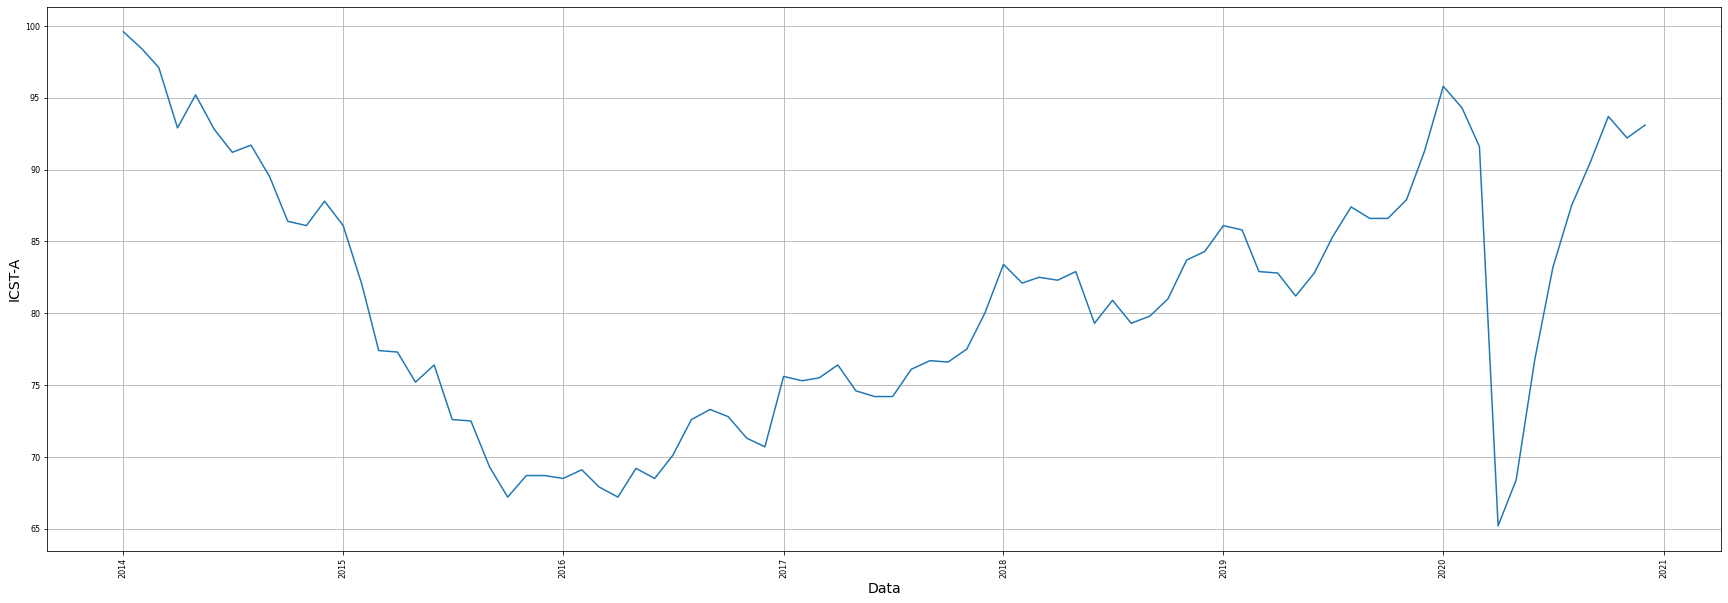

In [28]:
plt.figure(figsize=(30,10))
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=8)
mpl.rc('ytick', labelsize=8)
plt.xticks(rotation=90)
plt.grid(True)
sns.lineplot(data=icst, x = "Data", y = "ICST-A")

## **Geração de Energia Elétrica**

Histórico do volume de energia elétrica produzida no país em GWh, expressa pelos valores de carga de energia despachada no Sistema Interligado Nacional – SIN, classificada por fontes renováveis ou não e do volume produzido pelas geradoras ainda não interligadas.

Fonte: https://www.aneel.gov.br/dados/geracao

In [29]:
df = pd.read_csv('datasets/Geracao-Energia-PorFonte_2000_2020.csv', sep = ',', decimal='.')
df = df.drop(columns = ['ideGeracaoFonte','dthProcessamento'])

df = df.rename(columns={'anoReferencia':'year','mesReferencia':'month', 'mdaEnergiaDespachadaGWh': 'geracaoGWh'})
df['day'] = 1
df['date'] = pd.to_datetime(df[['year','month','day']])

df = df.set_index('date')['2014-01-01':'2020-12-12']

df= df.groupby('date')['geracaoGWh'].sum()

geracao_mensal = pd.DataFrame(df)

geracao_mensal.info()

# faltam 6 meses (de julho/2020 até dezembro/2020)
# Vamos calcular os missing values a partir da média dos últimos 12 meses

import datetime
for i in range(7,13): #meses faltantes
  geracao_mensal.loc[pd.to_datetime('2020-'+str(i)+'-01')] = geracao_mensal.tail(12).mean()


geracao_mensal.info()



<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 78 entries, 2014-01-01 to 2020-06-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   geracaoGWh  78 non-null     float64
dtypes: float64(1)
memory usage: 1.2 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 84 entries, 2014-01-01 to 2020-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   geracaoGWh  84 non-null     float64
dtypes: float64(1)
memory usage: 1.3 KB


<AxesSubplot:xlabel='date', ylabel='geracaoGWh'>

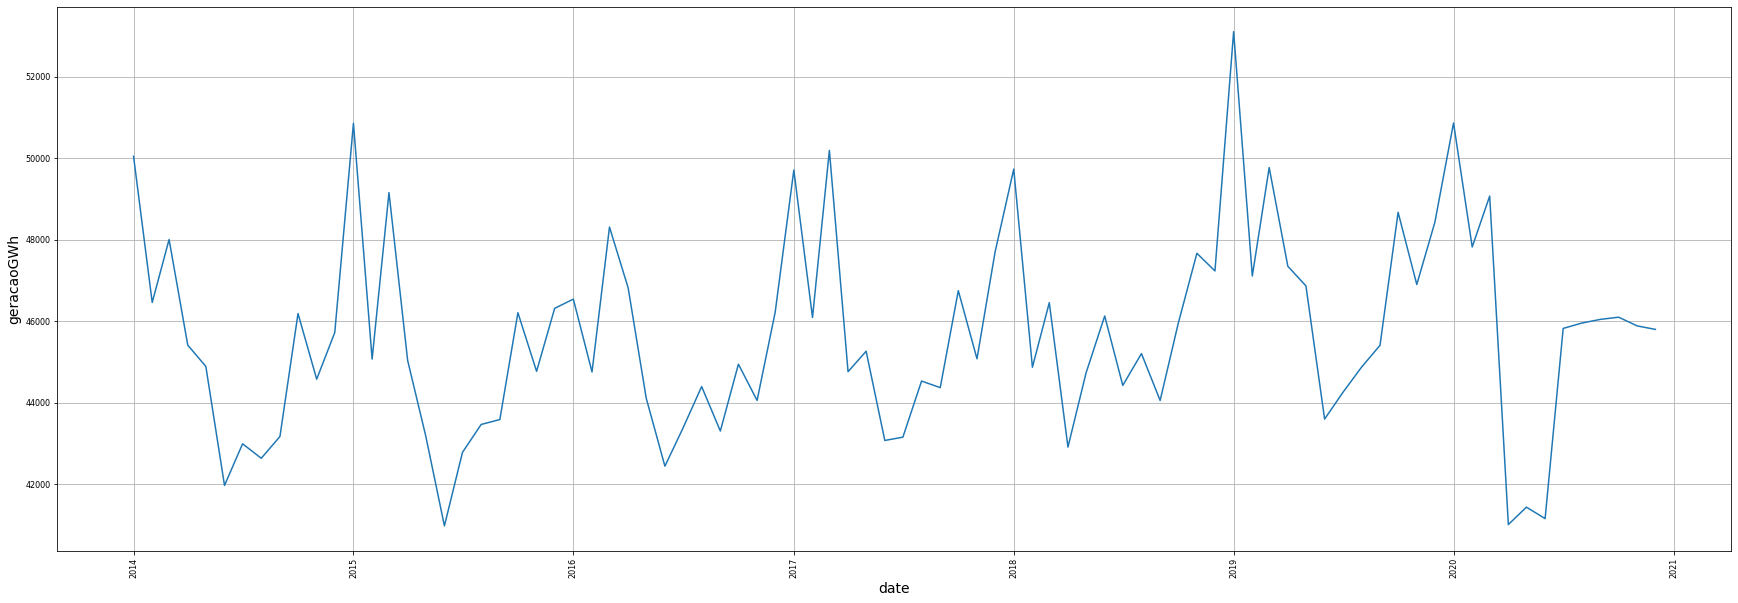

In [30]:
plt.figure(figsize=(30,10))
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=8)
mpl.rc('ytick', labelsize=8)
plt.xticks(rotation=90)
plt.grid(True)
sns.lineplot(data=geracao_mensal, x = "date", y = "geracaoGWh")

## **Índice de Confiança do Empresário Industrial (ICEI)**

Máquinas, aparelhos e materiais elétricos.

(1) Indicador varia entre 0 a 100 pontos:			

> valores acima de 50 pontos indicam confiança do empresário; 		
       valores abaixo de 50 pontos indicam falta de confiança do empresário.

(2) Agregação Abinee			
			
Fonte: CNI - Confederação Nacional da Indústria.
			
Última atualização em 25/03/2021

Fonte: http://www.abinee.org.br/abinee/decon/dados/shiceism.xlsx


In [31]:
confianca_empresario = pd.DataFrame()
confianca_empresario = pd.read_excel('datasets/Índice de confiança do empresário.xlsx', sheet_name= "ICEI Setor")

confianca_empresario = confianca_empresario.iloc[3:138, 0:5]

confianca_empresario = confianca_empresario.reset_index()
confianca_empresario = confianca_empresario.drop(['index'], axis = 1)

confianca_empresario.columns = ['data', 'IndEletronica', 'IndEletrica', 'IndEletronica+Eletrica', 'IndGeral' ]

confianca_empresario['IndEletronica'] = confianca_empresario['IndEletronica'].astype(float)
confianca_empresario['IndEletrica'] = confianca_empresario['IndEletrica'].astype(float)
confianca_empresario['IndEletronica+Eletrica'] = confianca_empresario['IndEletronica+Eletrica'].astype(float)
confianca_empresario['IndGeral'] = confianca_empresario['IndGeral'].astype(float)

for i in range(0, len(confianca_empresario['data'])):
    temp = confianca_empresario.loc[i,'data'].split('/')
    if temp[0] == 'jan':
        confianca_empresario.loc[i,'data'] = '01-20'+temp[1]
    elif temp[0] == 'fev':
        confianca_empresario.loc[i,'data'] = '02-20'+temp[1]
    elif temp[0] == 'mar':
        confianca_empresario.loc[i,'data'] = '03-20'+temp[1]
    elif temp[0] == 'abr':
        confianca_empresario.loc[i,'data'] = '04-20'+temp[1]
    elif temp[0] == 'mai':
        confianca_empresario.loc[i,'data'] = '05-20'+temp[1]
    elif temp[0] == 'jun':
        confianca_empresario.loc[i,'data'] = '06-20'+temp[1]
    elif temp[0] == 'jul':
        confianca_empresario.loc[i,'data'] = '07-20'+temp[1]
    elif temp[0] == 'ago':
        confianca_empresario.loc[i,'data'] = '08-20'+temp[1]
    elif temp[0] == 'set':
        confianca_empresario.loc[i,'data'] = '09-20'+temp[1]
    elif temp[0] == 'out':
        confianca_empresario.loc[i,'data'] = '10-20'+temp[1]
    elif temp[0] == 'nov':
        confianca_empresario.loc[i,'data'] = '11-20'+temp[1]
    else:
        temp[0] == 'dez'
        confianca_empresario.loc[i,'data'] = '12-20'+temp[1]
    
from datetime import date

confianca_empresario['data'] = pd.to_datetime(confianca_empresario['data'])
confianca_empresario['data'] = confianca_empresario['data'].dt.strftime('%Y-%m-%d') # Ajusta a coluna da data.
confianca_empresario['data'] = pd.to_datetime(confianca_empresario['data'])
confianca_empresario = confianca_empresario.set_index('data')
confianca_empresario = confianca_empresario['2014-01-01':'2020-12-01']
confianca_empresario

,IndEletronica,IndEletrica,IndEletronica+Eletrica,IndGeral
data,,,,
2014-01-01,47.4,45.3,46.308,53.1
2014-02-01,48.8,49.1,48.956,52.3
2014-03-01,48.9,47.6,48.224,52.4
2014-04-01,45.8,44.2,44.968,49.2
2014-05-01,42.6,40.1,41.300,47.9
...,...,...,...,...
2020-08-01,58.1,58.2,58.152,57.0
2020-09-01,63.0,63.1,63.052,61.6
2020-10-01,56.7,62.8,59.872,61.8


<AxesSubplot:xlabel='data', ylabel='IndEletrica'>

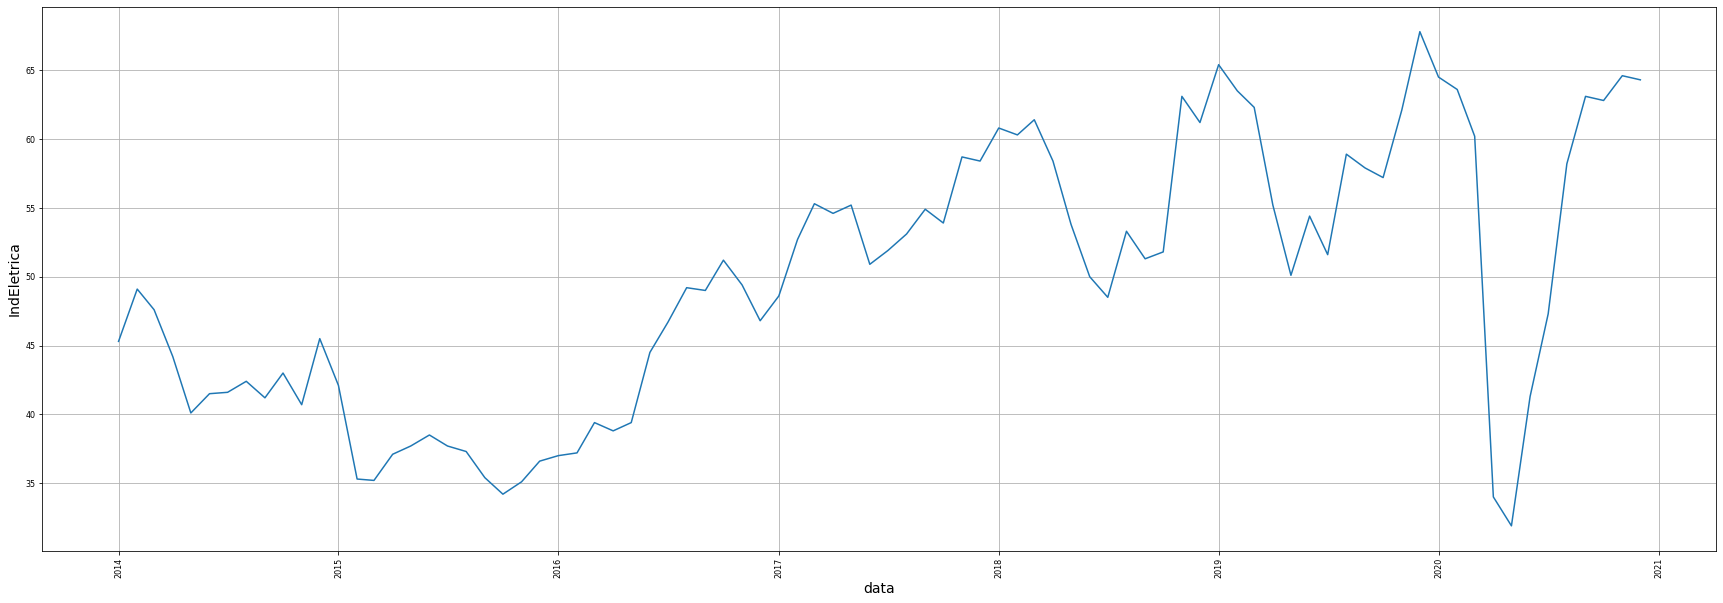

In [32]:
plt.figure(figsize=(30,10))
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=8)
mpl.rc('ytick', labelsize=8)
plt.xticks(rotation=90)
plt.grid(True)
sns.lineplot(data=confianca_empresario, x = "data", y = "IndEletrica")

# **Montagem do Data Set**

Aqui estão as variáveis selecionadas.

In [33]:
dados = pd.concat([vendas,atividade_economica,desemprego,gasto_construcao,financiamento_comercial,financiamento_residencial,
                   exportacoes, pib_mensal_interesse, variacao_mensal_pib,consumo_energia_eletrica, icst, geracao_mensal, confianca_empresario], axis=1)
dados.info()
dados.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 84 entries, 2014-01-01 to 2020-12-01
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    84 non-null     int64  
 1   month                   84 non-null     int64  
 2   interruptores           84 non-null     int64  
 3   pulsadores              84 non-null     int64  
 4   tomadas                 84 non-null     int64  
 5   total                   84 non-null     int64  
 6   day                     84 non-null     int64  
 7   IBC-Br                  84 non-null     float64
 8   Taxa de Desocupação     84 non-null     float64
 9   Imobiliário             84 non-null     float64
 10  Comercial               84 non-null     float64
 11  Residencial             84 non-null     float64
 12  material_eletrico       84 non-null     float64
 13  PIB                     84 non-null     float64
 14  Variacao_PIB            

,year,month,interruptores,pulsadores,tomadas,total,day,IBC-Br,Taxa de Desocupação,Imobiliário,...,PIB,Variacao_PIB,CONSUMO,ICST-A,ICST-R,geracaoGWh,IndEletronica,IndEletrica,IndEletronica+Eletrica,IndGeral
2014-01-01,2014,1,5109625,149613,8168659,13427897,1,2.75,6.4,1.827669e+10,...,455935.0,-3.720284,40279759.0,99.6,97.8,50045.962407,47.4,45.3,46.308,53.1
2014-02-01,2014,2,5235998,141128,8774994,14152120,1,3.13,6.7,1.859720e+10,...,450358.8,-1.223025,41653487.0,98.4,96.7,46459.730274,48.8,49.1,48.956,52.3
2014-03-01,2014,3,5100680,144853,8465237,13710770,1,3.09,7.2,1.892334e+10,...,462159.8,2.620355,40269429.0,97.1,96.3,48004.277170,48.9,47.6,48.224,52.4
2014-04-01,2014,4,4695875,132094,7774926,12602895,1,2.37,7.1,1.925519e+10,...,468767.5,1.429744,39591854.0,92.9,92.6,45412.583753,45.8,44.2,44.968,49.2
2014-05-01,2014,5,5563254,156946,8883242,14603442,1,2.23,7.0,1.959286e+10,...,473347.1,0.976945,39100499.0,95.2,94.6,44890.282526,42.6,40.1,41.300,47.9


Salvamos o objeto **dados** para ser utilizado no [Passo 2](passo2.ipynb)

In [35]:
file_to_store = open("datasets/dados.pickle", "wb")
pickle.dump(dados, file_to_store)
file_to_store.close()